In [ ]:
!pip install gym matplotlib numpy


In [ ]:
!pip inst

In [ ]:
!wget https://raw.githubusercontent.com/udacity/deep-reinforcement-learning/master/monte-carlo/plot_utils.py


--2025-02-20 06:22:27--  https://raw.githubusercontent.com/udacity/deep-reinforcement-learning/master/monte-carlo/plot_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2346 (2.3K) [text/plain]
Saving to: ‘plot_utils.py’

plot_utils.py       100%[===================>]   2.29K  --.-KB/s    in 0s      

2025-02-20 06:22:27 (34.2 MB/s) - ‘plot_utils.py’ saved [2346/2346]



In [ ]:
import os
print(os.listdir())  # Should list plot_utils.py


['.config', 'plot_utils.py', 'sample_data']


In [ ]:
import sys
import gym
import numpy as np
from collections import defaultdict

from plot_utils import plot_blackjack_values, plot_policy

In [ ]:
env = gym.make('Blackjack-v1')

/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
print(env.observation_space)
print(env.action_space)

Tuple(Discrete(32), Discrete(11), Discrete(2))
Discrete(2)


In [ ]:
for i_episode in range(3):
    state = env.reset()
    while True:
        print(state)
        action = env.action_space.sample()
        state, reward, done, info = env.step(action)
        if done:
            print('End game! Reward: ', reward)
            print('You won :)\n') if reward > 0 else print('You lost :(\n')
            break

(21, 2, True)
(19, 2, False)
End game! Reward:  0.0
You lost :(

(15, 3, False)
End game! Reward:  1.0
You won :)

(20, 9, False)
End game! Reward:  -1.0
You lost :(



/usr/local/lib/python3.11/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [ ]:
def generate_episode_from_limit_stochastic(bj_env):
    episode = []
    state = bj_env.reset()
    while True:
        probs = [0.8, 0.2] if state[0] > 18 else [0.2, 0.8]
        action = np.random.choice(np.arange(2), p=probs)
        next_state, reward, done, info = bj_env.step(action)
        episode.append((state, action, reward))
        state = next_state
        if done:
            break
    return episode

In [ ]:
for i in range(3):
    print(generate_episode_from_limit_stochastic(env))

[((20, 8, False), 0, 1.0)]
[((13, 5, False), 0, -1.0)]
[((20, 10, False), 0, 1.0)]


In [ ]:
def mc_prediction_q(env, num_episodes, generate_episode, gamma=1.0):
    returns_sum = defaultdict(lambda: np.zeros(env.action_space.n))
    N = defaultdict(lambda: np.zeros(env.action_space.n))
    Q = defaultdict(lambda: np.zeros(env.action_space.n))

    for i_episode in range(1, num_episodes + 1):
        if i_episode % 1000 == 0:
            print(f"\rEpisode {i_episode}/{num_episodes}.", end="")
            sys.stdout.flush()

        episode = generate_episode(env)
        states, actions, rewards = zip(*episode)

        G = 0
        for t in reversed(range(len(episode))):
            G = gamma * G + rewards[t]
            if (states[t], actions[t]) not in list(zip(states[:t], actions[:t])):  # First-visit check
                returns_sum[states[t]][actions[t]] += G
                N[states[t]][actions[t]] += 1
                Q[states[t]][actions[t]] = returns_sum[states[t]][actions[t]] / N[states[t]][actions[t]]

    return Q


Episode 500000/500000.

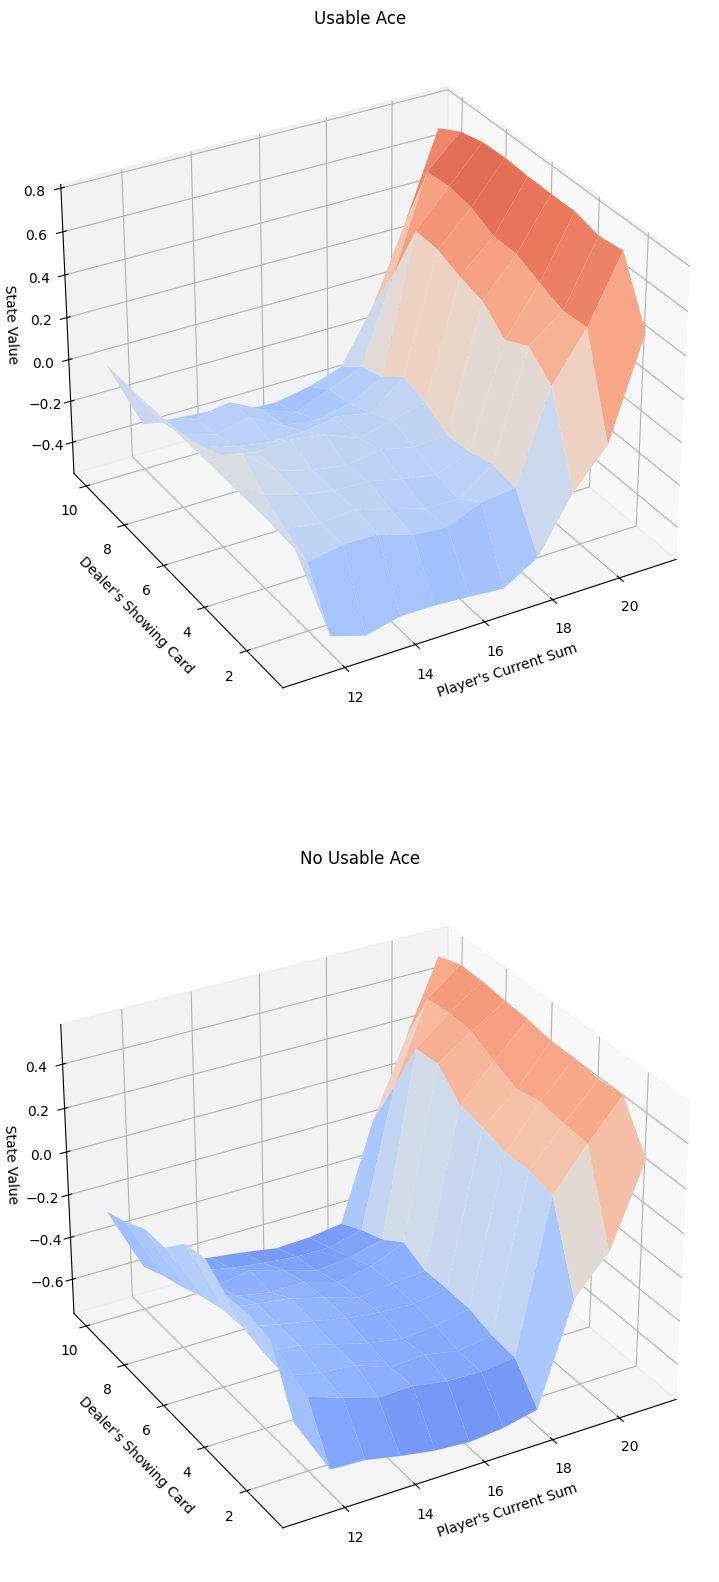

In [ ]:
# obtain the action-value function
Q = mc_prediction_q(env, 500000, generate_episode_from_limit_stochastic)

# obtain the corresponding state-value function
V_to_plot = dict((k,(k[0]>18)*(np.dot([0.8, 0.2],v)) + (k[0]<=18)*(np.dot([0.2, 0.8],v))) \
         for k, v in Q.items())

# plot the state-value function
plot_blackjack_values(V_to_plot)